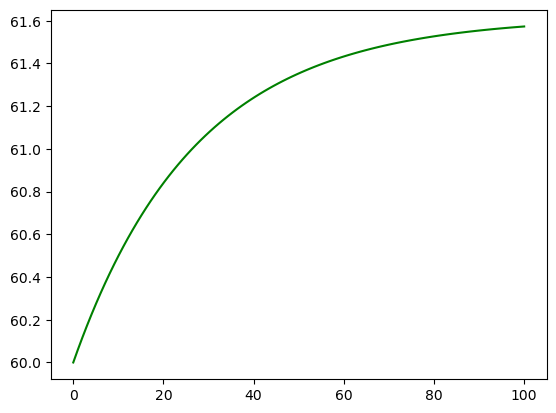

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ti = 80
ts = 25
cp=1
thou =1000
v=1000
ua=5714
y0 = 60

def heating(Y, t):
    dy = (f(Y)*thou*cp*ti-ua*(Y-ts)-f(Y)*thou*cp*Y)/(v*cp*thou)
    return dy

def f(Y):
    yset = 63
    kc = 1
    return 10+kc*(yset-Y)

# Time span
t = np.linspace(0, 100, 100)
Y = odeint(heating, y0, t)

plt.plot(t, Y, label='T(t)', color='green')

plt.show()


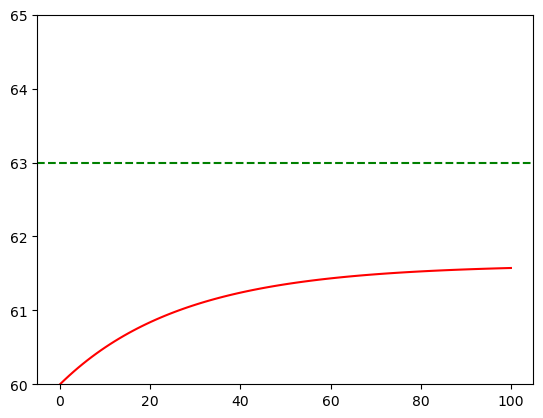

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ti = 80
ts = 25
cp=1
thou =1000
v=1000
ua=5714
y0 = 60

def heating(Y, t):
    dy = (f(Y)*thou*cp*ti-ua*(Y-ts)-f(Y)*thou*cp*Y)/(v*cp*thou)
    return dy

def f(Y):
    yset = 63
    kc = 1
    return 10+kc*(yset-Y)

# Time span
t = np.linspace(0, 100, 100)
Y = odeint(heating, y0, t)

plt.plot(t, Y, label='T(t)', color='red')
plt.axhline(y=63,color='green', linestyle='--')
plt.ylim([60,65])
plt.show()


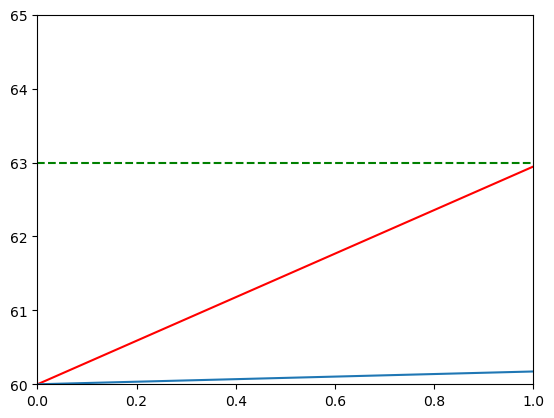

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ti = 80
ts = 25
cp=1
thou =1000
v=1000
ua=5714
y0 = 60

def heating(Y, t):
    dy = (f(Y)*thou*cp*ti-ua*(Y-ts)-f(Y)*thou*cp*Y)/(v*cp*thou)
    return dy

def f(Y):
    yset = 63
    kc = 300
    return 10+kc*(yset-Y)
def linear(t):
    return 60 + 0.7826*3*(1-np.exp(-t/13.0435))
# Time span
t = np.linspace(0, 100, 100)
Y = odeint(heating, y0, t)
yline = linear(t)
plt.plot(t, Y, label='T(t)', color='red')
plt.plot(t,yline)
plt.axhline(y=63,color='green', linestyle='--')
plt.ylim([60,65])
plt.xlim([0,1])
plt.show()


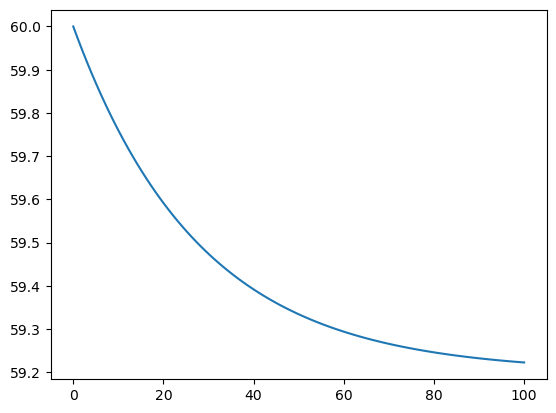

In [9]:
def linear(y,t):
    dydt = 60 + 0.7826*3*(1-np.exp(-t/13.0435))
    return dydt
t = np.linspace(0, 100, 100)
plt.plot(t,yline)
plt.show()

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ti = 80
ts = 20
cp=1
thou =1000
v=1000
ua=5714
y0 = 60

def heating(Y, t):
    dy = (f(Y)*thou*cp*ti-ua*(Y-ts)-f(Y)*thou*cp*Y)/(v*cp*thou)
    return dy

def f(Y):
    yset = 60
    kc = 1
    return 10+kc*(yset-Y)

def linear(t):
    return 60 - 0.3636*5/(1+1.2727)*(1-np.exp(-t/(63.6/(1+1.2727))))

# Time span
t = np.linspace(0, 100, 100)
Y = odeint(heating, y0, t)
yline = linear(t)
plt.plot(t, Y, label='T(t)', color='red')
plt.plot(t,yline)
plt.axhline(y=60,color='green', linestyle='--')

plt.show()


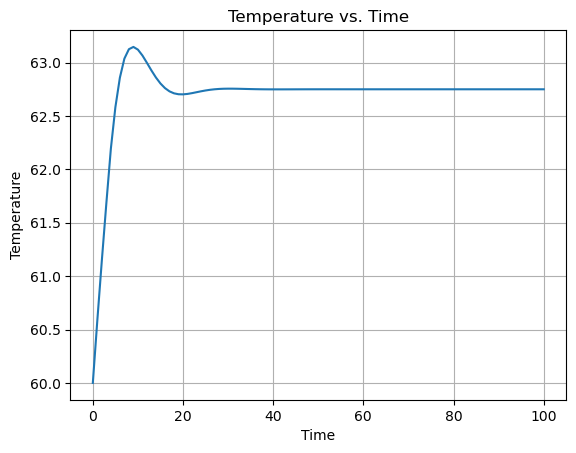

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the thermal_delay function
def thermal_delay(temp, t):
    global f
    ti = 80
    ts = 25
    cp = 1
    thou = 1000
    v = 1000
    ua = 5714
    dydt = (f * thou * cp * ti - ua * (temp - ts) - f * thou * cp * temp) / (v * cp * thou)
    return dydt

# Main program
temp_1 = 60
temp_2 = 60
temp_3 = 60
ti = 0
te = 1
tt = [0]
yy = [60]
temp0 = 60
temps = 63
kc = 10

for i in range(100):
    f = 10 + kc * (temps - temp_3)
    t = np.linspace(ti, te, 50)
    sol = odeint(thermal_delay, temp0, t)
    temp_3, temp_2, temp_1 = temp_2, temp_1, temp0
    temp0 = sol[-1]
    ti = te
    te += 1
    tt.append(ti)
    yy.append(temp0)

# Plot
plt.plot(tt, yy)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature vs. Time')
plt.grid(True)
plt.show()


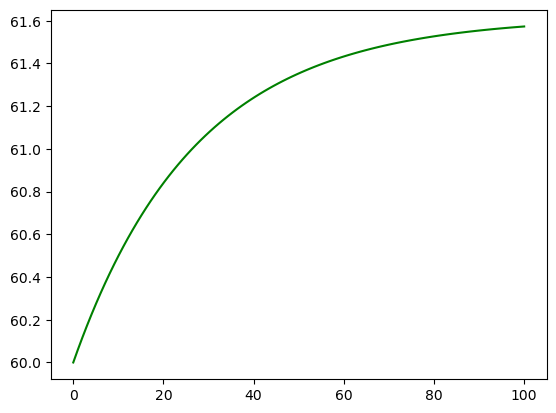

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ti = 80
ts = 25
cp=1
thou =1000
v=1000
ua=5714
y0 = 60

def heating(Y, t):
    dy = (f(Y)*thou*cp*ti-ua*(Y-ts)-f(Y)*thou*cp*Y)/(v*cp*thou)
    return dy

def f(Y):
    yset = 63
    kc = 1
    return 10+kc*(yset-Y)

# Time span
t = np.linspace(0, 100, 100)
Y = odeint(heating, y0, t)

plt.plot(t, Y, label='T(t)', color='green')

plt.show()

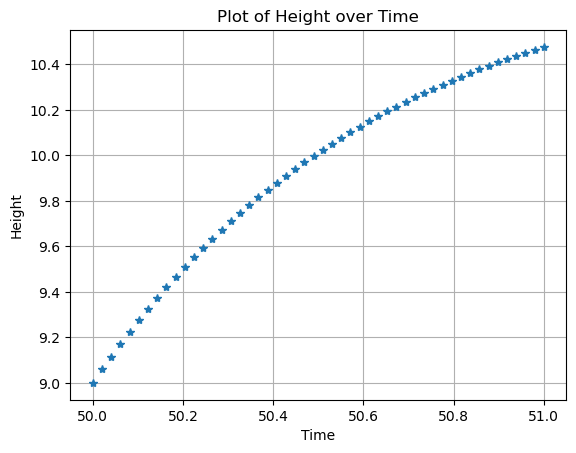

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function
def level(h, t):
    dydt = (fi - np.sqrt(h)) / 5
    return dydt

# Main program
fi = 3.3
ti, te = 0, 1 #開始的時間，結束的時間(一周期)
h0 = 9
time = [0] #時間從零開始
height = [h0] #高度初始值
hf = [h0]  # 一個帶噪聲一個不帶
nn = [0]
h1 = np.zeros(50)  # Initialize h1 as an array of zeros
for i in range(50):
    t = np.linspace(ti, te, 100)
    h = odeint(level, h0, t)
    time.append(t[-1])
    noise = np.random.randn() * 0.05
    nn.append(noise)
    hm = h0 + noise
    height.append(hm)
    h1[i] = h0  # Store the value of h0 in the ith position of h1
    h0 = h[-1]  # Use the last value of h from the solution
    ti = te
    te += 1

plt.plot(np.linspace(ti, te, 50), h1, '*')  # Plot h1 against the corresponding time points
plt.xlabel('Time')
plt.ylabel('Height')
plt.title('Plot of Height over Time')
plt.grid(True)
plt.show()
